 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initializing imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Setting the path
whale_returns_file_path = Path("Resources/whale_returns.csv")
algo_returns_file_path = Path("Resources/algo_returns.csv")
sp500_historic_prices_path = Path("Resources/sp500_history.csv")


# Reading whale returns and setting the date as the index to the DataFrame
whale_returns_df = pd.read_csv(whale_returns_file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.index = whale_returns_df.index.strftime('%Y-%m-%d')
whale_returns_df = whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Counting nulls
whale_returns_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [4]:
# Dropping nulls
whale_returns_df = whale_returns_df.dropna()

whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns and setting the date as the index to the DataFrame
algo_returns_df = pd.read_csv(algo_returns_file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.index = algo_returns_df.index.strftime('%Y-%m-%d')
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Counting nulls
algo_returns_df.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [7]:
# Dropping nulls
algo_returns_df = algo_returns_df.dropna()

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, setting the date as the index to the DataFrame
sp500_historic_prices_df = pd.read_csv(sp500_historic_prices_path, index_col = "Date", infer_datetime_format= True, parse_dates=True)
sp500_historic_prices_df.index = sp500_historic_prices_df.index.strftime('%Y-%m-%d')
sp500_historic_prices_df = sp500_historic_prices_df.sort_index()
sp500_historic_prices_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
#Getting rid of $ signs
sp500_historic_prices_df['Close'] = sp500_historic_prices_df['Close'].str.replace('$', '')
print(sp500_historic_prices_df['Close'])


# Checking Data Types
sp500_historic_prices_df['Close'].dtype

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object


dtype('O')

In [10]:
# Converting Data Types into a Float
sp500_historic_prices_df['Close'] = sp500_historic_prices_df['Close'].astype('float')
sp500_historic_prices_df['Close'].dtype


dtype('float64')

In [11]:
# Calculating Daily Returns
sp500_daily_returns = sp500_historic_prices_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Dropping nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['S&P 500']
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis = 'columns', join = 'inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

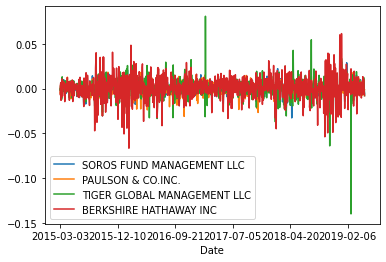

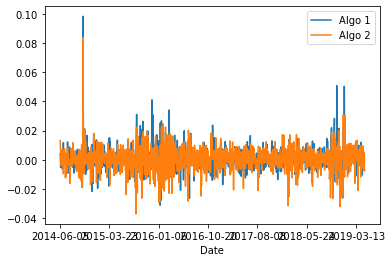

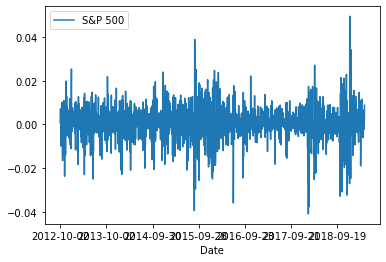

In [15]:
# Plot daily returns of all portfolios
whale_returns_df.plot()
algo_returns_df.plot()
sp500_daily_returns.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

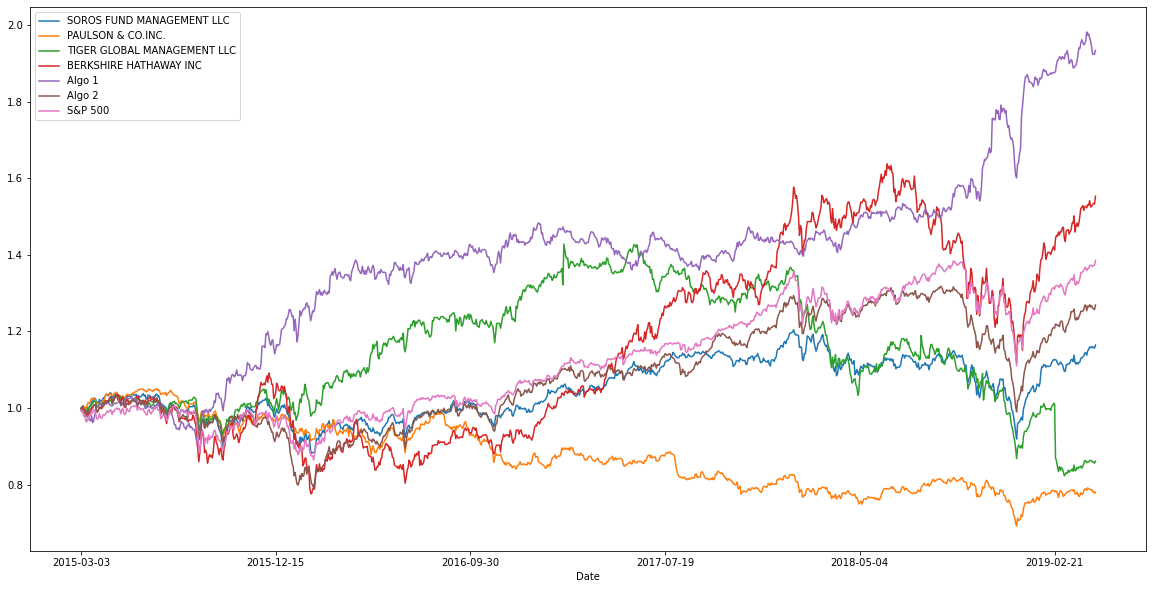

In [16]:
# Calculating cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()


# Plotting cumulative returns

cumulative_returns.plot(figsize = (20, 10))

---

### Create a box plot for each portfolio


<AxesSubplot:>

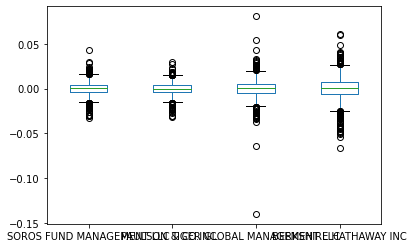

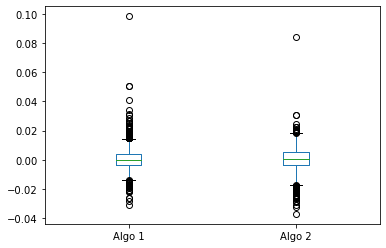

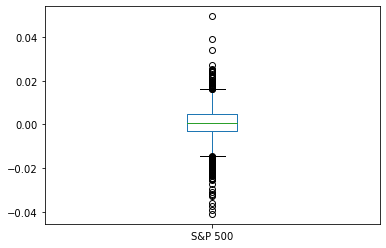

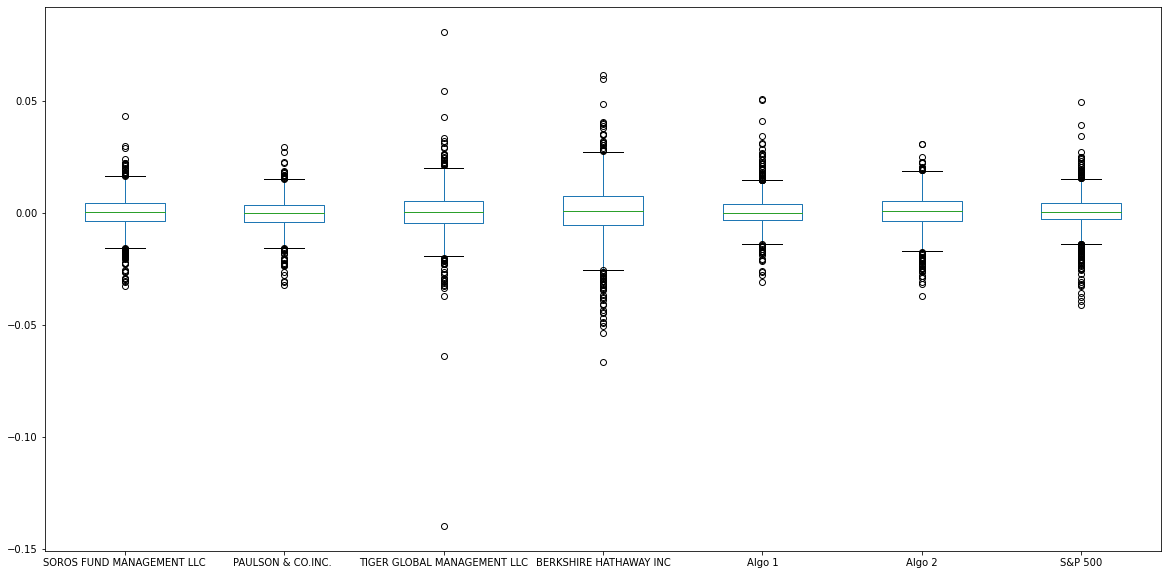

In [17]:
# Box plot to visually show risk of each portfolio
whale_returns_df.plot.box()
algo_returns_df.plot.box()
sp500_daily_returns.plot.box()

# Combined portfolios box plot
combined_df.plot.box(figsize = (20, 10))


### Calculate Standard Deviations

In [18]:
# Calculating the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [26]:
# Calculating  the daily standard deviation of S&P 500
sp500_std = sp500_daily_returns.std()
sp500_std

# Determining which portfolios are riskier than the S&P 500
combined_std.loc[combined_std > combined_std.loc['S&P 500']] 


TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [ ]:
### Calculate the Annualized Standard Deviation

In [140]:
# Calculating the annualized standard deviation (252 trading days)
cumulative_annualized_returns = combined_std * np.sqrt(252)
cumulative_annualized_returns

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

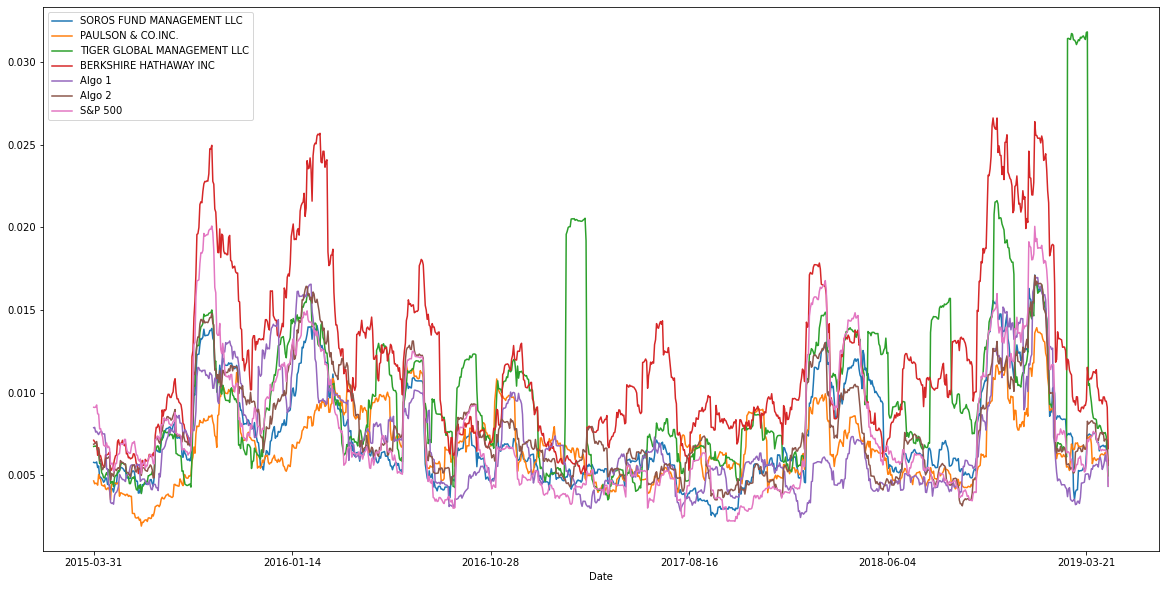

In [141]:
# Calculating the rolling standard deviation for all portfolios using a 21-day window
cumulative_rolling_std = combined_df.rolling(window=21).std().dropna()
cumulative_rolling_std


# Plot the rolling standard deviation
cumulative_rolling_std.plot(figsize = (20, 10))

### Calculate and plot the correlation

<AxesSubplot:>

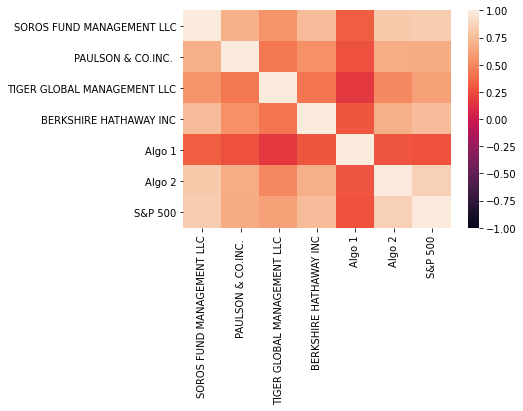

In [142]:
# Calculating the correlation
combined_df_corr = combined_df.corr()
combined_df_corr

# Displaying the correlation matrix
sns.heatmap(combined_df_corr, vmin=-1, vmax=+1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

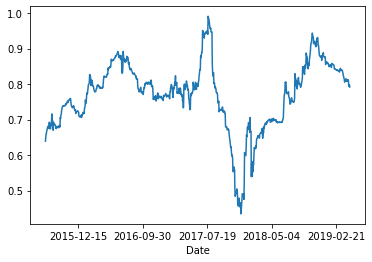

In [143]:
# Calculating covariance of Soros Fund Management

soros_fund_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P 500'])

# Calculating variance of S&P 500

sp500_variance = combined_df['S&P 500'].var()


# Computing Soros Fund Management beta

soros_fund_beta = soros_fund_covariance / sp500_variance

# Plotting beta trend for 100 days

# Calculating 100-day rolling covariance of Soros Fund Management
rolling_soros_fund_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=100).cov(combined_df['S&P 500'])

# Calculating 100-day rolling variance of S&P 500
rolling_sp500_variance = combined_df['S&P 500'].rolling(window=100).var()

# Calculating 100-day rolling beta of Soros Fund Management
rolling_soros_fund_beta = rolling_soros_fund_covariance / rolling_sp500_variance

# Plotting the data
rolling_soros_fund_beta.plot()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

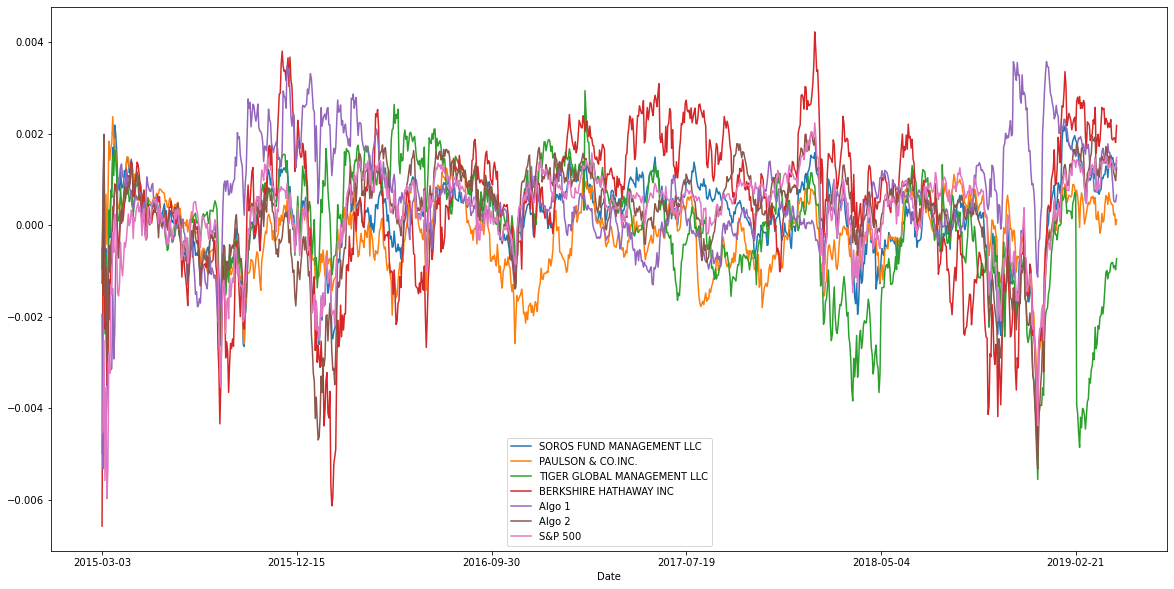

In [144]:
# Using `ewm` to calculate the rolling window
df_rolling_window = combined_df.ewm(halflife=21).mean()
df_rolling_window.plot(figsize = (20, 10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [145]:
# Calculating Annualized Sharpe Ratios

annual_sharpe_ratios = (combined_df.mean() * 252) / (cumulative_annualized_returns)
annual_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:>

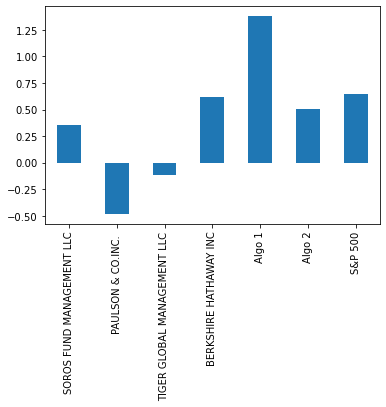

In [146]:
# Visualizing the sharpe ratios as a bar plot
annual_sharpe_ratios.plot(kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

Algo 1 outperforms all of the stocks in our combined portfolio as it has the highest sharpe ratio. It is also the only asset in our portfolio, where it's sharpe ratio is higher than 1.
However, while Algo 2 is outperforming most of our assets, it's sharpe ratio is less than of Berhshire Hatahway Inc, which belongs to the Whale portfolio.
Overall, the algorithmic strategies outperform the rest of our portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [147]:
# For this project I picked four stocks for the following companies: Microsoft (MSFT), Tesla (TSLA), Intel (INTC), and All State (ALL).

# Setting the path
msft_path = Path("Resources/msft.csv")
tsla_path = Path("Resources/tsla.csv")
intc_path = Path("Resources/intc.csv")
all_state_path = Path("Resources/all.csv")

# Reading data from 1st stock

msft_df = pd.read_csv(msft_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
# Resetting Date index
msft_df.index = msft_df.index.strftime('%Y-%m-%d')
# Sorting Date index
msft_df = msft_df.sort_index()
# Renaming the Close column
msft_df.columns = ['MSFT']
msft_df.head()


,MSFT
Date,
2017-06-15,69.90
2017-06-16,70.00
2017-06-19,70.87
2017-06-20,69.91
2017-06-21,70.27


In [148]:
# Reading data from 2nd stock
tsla_df = pd.read_csv(tsla_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
# Reset Date index
tsla_df.index = tsla_df.index.strftime('%Y-%m-%d')
# Sorting Date index
tsla_df = tsla_df.sort_index()
# Renaming the Close column
tsla_df.columns = ['TSLA']
tsla_df.head()

,TSLA
Date,
2017-06-15,75.07
2017-06-16,74.28
2017-06-19,73.96
2017-06-20,74.45
2017-06-21,75.28


In [149]:
# Reading data from 3rd and 4th stocks.

intc_df = pd.read_csv(intc_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
# Reset Date index
intc_df.index = intc_df.index.strftime('%Y-%m-%d')
# Sorting Date index
intc_df = intc_df.sort_index()
# Renaming the Close column
intc_df.columns = ['INTC']

all_state_df = pd.read_csv(all_state_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
# Reset Date index
all_state_df.index = all_state_df.index.strftime('%Y-%m-%d')
# Sorting Date index
all_state_df = all_state_df.sort_index()
# Renaming the Close column
all_state_df.columns = ['ALL']
all_state_df.head()

,ALL
Date,
2017-06-15,89.79
2017-06-16,89.82
2017-06-19,89.41
2017-06-20,89.26
2017-06-21,89.24


In [150]:
# Combining all stocks in a single DataFrame
stock_portfolio = pd.concat([msft_df, tsla_df, intc_df, all_state_df], axis = 'columns', join = 'inner')
stock_portfolio.head()



,MSFT,TSLA,INTC,ALL
Date,,,,
2017-06-15,69.90,75.07,35.31,89.79
2017-06-16,70.00,74.28,35.21,89.82
2017-06-19,70.87,73.96,35.51,89.41
2017-06-20,69.91,74.45,34.86,89.26
2017-06-21,70.27,75.28,34.58,89.24


In [151]:
# Calculating daily returns and dropping NAs
customized_portfolio_daily_returns = stock_portfolio.pct_change().dropna()

# Displaying sample data
customized_portfolio_daily_returns.head()



,MSFT,TSLA,INTC,ALL
Date,,,,
2017-06-16,0.001431,-0.010524,-0.002832,0.000334
2017-06-19,0.012429,-0.004308,0.008520,-0.004565
2017-06-20,-0.013546,0.006625,-0.018305,-0.001678
2017-06-21,0.005149,0.011148,-0.008032,-0.000224
2017-06-22,-0.000142,0.016472,-0.006362,-0.010421


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [152]:
# Setting weights equially throughout the portfolio
weights = [0.25, 0.25, 0.25, 0.25]

# Calculating portfolio return
customized_portfolio_returns = customized_portfolio_daily_returns.dot(weights)

# Display sample data
customized_portfolio_returns.head()

Date
2017-06-16   -0.002898
2017-06-19    0.003019
2017-06-20   -0.006726
2017-06-21    0.002010
2017-06-22   -0.000113
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [155]:
# Join your returns DataFrame to the original returns DataFrame
united_df = pd.concat([combined_df, customized_portfolio_daily_returns], axis = 'columns', join = 'inner')
united_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,MSFT,TSLA,INTC,ALL
Date,,,,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.002313,0.026089,0.007640,0.018568
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.008280,-0.007682,0.032622,-0.007740
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.013140,0.007373,-0.001195,-0.007287
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.003161,-0.038426,0.005642,0.003619
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.013575,0.004377,-0.000680,0.002266


In [157]:
# Drppping NaNs
united_df = united_df.dropna()
united_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
MSFT                           0
TSLA                           0
INTC                           0
ALL                            0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

In [ ]:
### Calculating the Annualized Standard Deviation

In [158]:
# Calculating the annualized `std`
customized_portfolio_annual = customized_portfolio_daily_returns.std() * np.sqrt(252)
customized_portfolio_annual


MSFT    0.296353
TSLA    0.641732
INTC    0.372780
ALL     0.266626
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

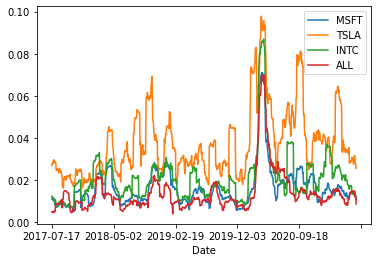

In [162]:
# Calculating rolling standard deviation
customized_portfolio_21_day_rolling_std = customized_portfolio_daily_returns.rolling(window=21).std().dropna()

# Plotting rolling standard deviation
customized_portfolio_21_day_rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

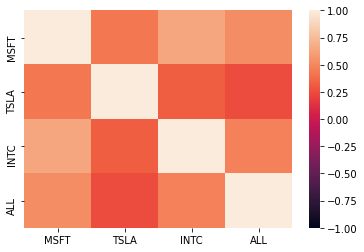

In [163]:
# Calculating and plotting the correlation
customized_portfolio_daily_returns_corr = customized_portfolio_daily_returns.corr()

# Displaying the correlation matrix
sns.heatmap(customized_portfolio_daily_returns_corr, vmin=-1, vmax=+1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

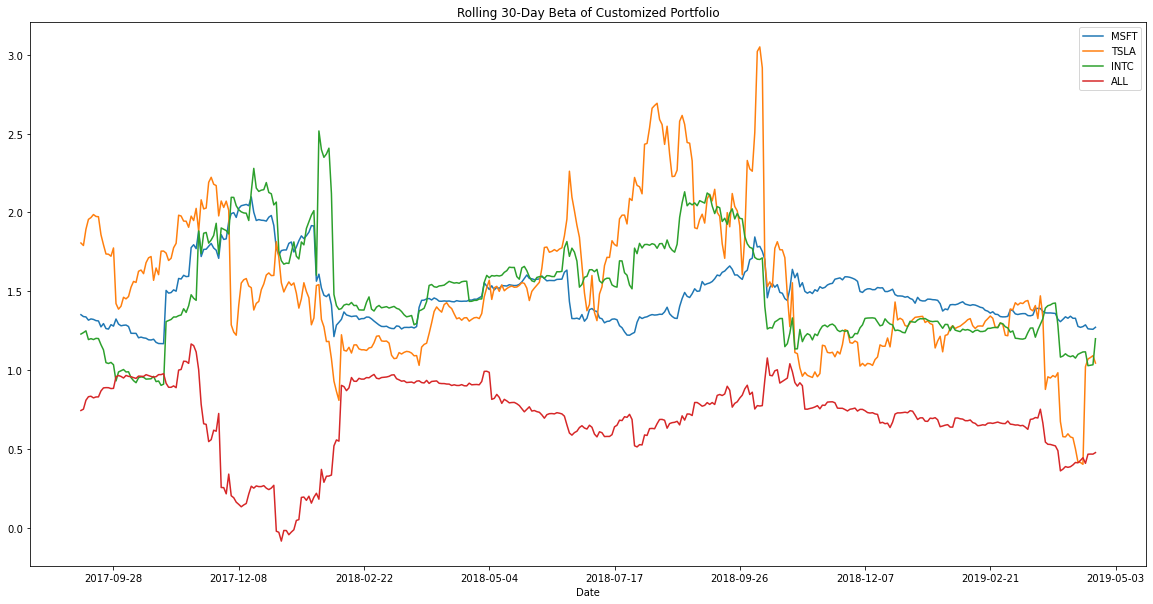

In [167]:
# Calculating and plotting rolling 60-day Beta

# Calculating rolling covariance of Microsoft, Tesla, Intel, and All State

rolling_msft_covariance = customized_portfolio_daily_returns['MSFT'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_tsla_covariance = customized_portfolio_daily_returns['TSLA'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_intc_covariance = customized_portfolio_daily_returns['INTC'].rolling(window=60).cov(combined_df['S&P 500'])
rolling_all_state_covariance = customized_portfolio_daily_returns['ALL'].rolling(window=60).cov(combined_df['S&P 500'])

# Calculating rolling variance of S&P 500

rolling_sp500_variance = combined_df['S&P 500'].rolling(window=60).var()

# Computing Microsoft, Tesla, Intel, and All State rolling betas

rolling_msft_beta = rolling_msft_covariance / rolling_sp500_variance
rolling_tsla_beta = rolling_tsla_covariance / rolling_sp500_variance
rolling_intc_beta = rolling_intc_covariance / rolling_sp500_variance
rolling_all_state_beta = rolling_all_state_covariance / rolling_sp500_variance

ax = rolling_msft_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Customized Portfolio')
rolling_tsla_beta.plot(ax=ax)
rolling_intc_beta.plot(ax=ax)
rolling_all_state_beta.plot(ax=ax)

# Setting the legend of the figure
ax.legend(["MSFT", "TSLA", "INTC", "ALL"])


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [168]:
# Calculating Annualzied Sharpe Ratios
customized_portfolio_annual_sharpe_ratios = (customized_portfolio_daily_returns.mean() * 252) / (customized_portfolio_annual)
customized_portfolio_annual_sharpe_ratios

MSFT    1.259989
TSLA    1.143212
INTC    0.523594
ALL     0.489717
dtype: float64

<AxesSubplot:>

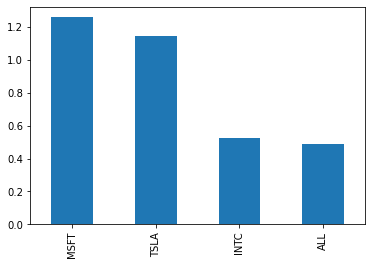

In [169]:
# Visualize the sharpe ratios as a bar plot
customized_portfolio_annual_sharpe_ratios.plot(kind = "bar")

### How does your portfolio do?

Write your answer here!

In [27]:
# My portfolio is looking fine overall. However, I might consider liquidating All State positions due to the following:
# - The rest of the stocks are outperforming All State by both, Beta and Sharpe ratio.
# - All State is closely correlated with Tesla. Thus, according to the data analysis above, it is reasonable to keep only the one of those two which has a better performance.
